In [113]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

with open("messages.csv", "r") as f:
    reader = csv.reader(f)
    data_list = []
    for idx, row in enumerate(reader, start=1):
        if idx == 1:
            continue
        data_list.append(row)
        # 将列表数据转换为 Pandas DataFrame
        # 检查每行的元素个数
    df = pd.DataFrame.from_records(data_list, columns=next(reader, None))
# 读取CSV文件
# df = pd.read_csv('messages.csv')
# 
# # 选择特定列的数据
# print(df)
selected_data = df[[8, 4, 11, 12, 13]]
# 联系人
NickName_data = df[[11]]
print(NickName_data)
filtered_data = selected_data[selected_data[4] == "1"]

filtered_data = filtered_data[df[12] == "电子学院总代理吃吃喝喝分代理"]
# filtered_data = filtered_data[df[13] == "范妞"]
# 打印选择的数据
print(filtered_data)
filtered_data[8] = pd.to_datetime(filtered_data[8])

filtered_data['month'] = filtered_data[8].dt.to_period('M')  # 按月份进行分组
filtered_data['hour'] = filtered_data[8].dt.to_period('H')

         11
0          
1          
2          
3          
4          
...     ...
195343  张老板
195344  张老板
195345  张老板
195346     
195347  何胜军

[195348 rows x 1 columns]
                         8  4  11              12 13
32889   2022-05-07 18:50:34  1     电子学院总代理吃吃喝喝分代理   
32892   2022-05-07 18:50:56  1     电子学院总代理吃吃喝喝分代理   
32911   2022-05-07 18:57:55  1     电子学院总代理吃吃喝喝分代理   
32912   2022-05-07 19:00:50  1     电子学院总代理吃吃喝喝分代理   
32913   2022-05-07 19:00:54  1     电子学院总代理吃吃喝喝分代理   
...                     ... .. ..             ... ..
195171  2023-12-15 10:10:08  1     电子学院总代理吃吃喝喝分代理   
195172  2023-12-15 10:10:19  1     电子学院总代理吃吃喝喝分代理   
195240  2023-12-15 11:50:48  1     电子学院总代理吃吃喝喝分代理   
195241  2023-12-15 11:51:04  1     电子学院总代理吃吃喝喝分代理   
195242  2023-12-15 11:51:10  1     电子学院总代理吃吃喝喝分代理   

[2015 rows x 5 columns]


/tmp/ipykernel_2174/518374102.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_data[df[12] == "电子学院总代理吃吃喝喝分代理"]


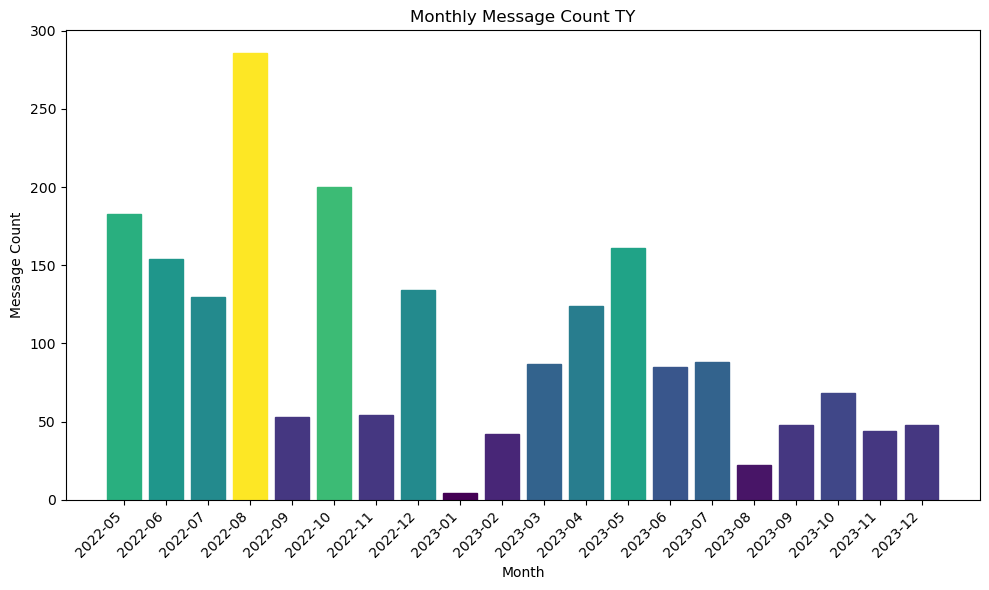

In [115]:
monthly_counts = filtered_data.groupby('month').size().reset_index(name='message_count')

# 将 Period 转换为日期
monthly_counts['month_str'] = monthly_counts['month'].astype(str)
# 创建渐变颜色
colors = plt.cm.viridis_r(monthly_counts['message_count'] / monthly_counts['message_count'].max())
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_counts['month_str'], monthly_counts['message_count'],
               color=plt.cm.viridis(monthly_counts['message_count'] / max(monthly_counts['message_count'])))
# 添加颜色条
color_map = LinearSegmentedColormap.from_list('color_map', plt.cm.viridis.colors, N=len(monthly_counts))
for bar in bars:
    bar.set_color(color_map(bar.get_height() / max(monthly_counts['message_count'])))
plt.xlabel('Month')
plt.ylabel('Message Count')
plt.title('Monthly Message Count TY')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# 保存图像
plt.savefig('comparison_chart.png')
plt.show()

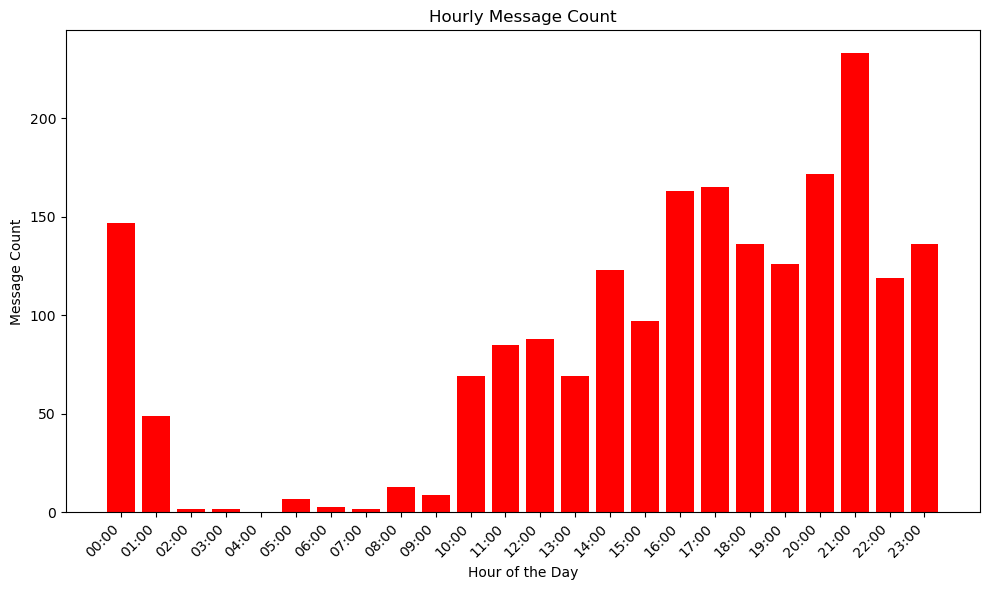

In [116]:
# 将时间按小时分组，并计算每个小时的消息数量
hourly_counts = filtered_data.groupby(filtered_data[8].dt.hour).size().reset_index(name='message_count')

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts[8], hourly_counts['message_count'], color='red')
plt.xlabel('Hour of the Day')
plt.ylabel('Message Count')
plt.title('Hourly Message Count')
plt.xticks(range(24), labels=[f"{hour:02d}:00" for hour in range(24)], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
hourly_counts = selected_data.groupby(selected_data[8].dt.hour).size().reset_index(name='message_count')

# 绘制整体聊天频率的柱状图
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.bar(hourly_counts[8], hourly_counts['message_count'], color='blue', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Message Count')
plt.title('Hourly Message Count for Sender "1" (Overall)')

# 选择与其他人聊天的数据（示例：与第2个人聊天）
other_person_data = df[df[4] == "2"]
other_person_data[8] = pd.to_datetime(other_person_data[8])

# 将时间按小时分组，并计算每个小时的消息数量
other_person_hourly_counts = other_person_data.groupby(other_person_data[8].dt.hour).size().reset_index(
    name='message_count')

# 绘制与其他人聊天频率的柱状图，并设置为半透明
plt.subplot(2, 1, 2)
plt.bar(other_person_hourly_counts[8], other_person_hourly_counts['message_count'], color='orange', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Message Count')
plt.title('Hourly Message Count for Sender "2" (Other Person)')

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig('comparison_chart.png')

# 显示图像
plt.show()

In [251]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


class ChatDataAnalyzer:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = self.read_csv()

    def read_csv(self):
        with open(self.file_path, "r") as f:
            reader = csv.reader(f)
            columns = next(reader)
            columns.extend(["NowNickName", "GroupRemarks"])
            data_list = []
            for idx, row in enumerate(reader, start=1):
                data_list.append(row)
            df = pd.DataFrame.from_records(data_list, columns=columns)
            df["StrTime"] = pd.to_datetime(df["StrTime"])
            df = df[["IsSender", "Type", "StrContent", "StrTime", "NowNickName", "GroupRemarks"]]
        return df

    def select_columns(self, columns):
        return self.df[columns]

    def filter_data(self, conditions_list):
        if not conditions_list:
            # 如果条件列表为空，返回原始 DataFrame
            return self.df
        else:
            # 使用逻辑运算符 &（与） 将条件列表中的条件组合起来
            combined_condition = conditions_list[0]
            for condition in conditions_list[1:]:
                combined_condition = combined_condition & condition

            # 返回过滤后的 DataFrame
            return self.df[combined_condition]

    def analyze_time_series(self, column, groupby=None):
        if groupby:
            return self.df[column].groupby(groupby).size().reset_index(name='counts')
        else:
            return self.df[column].value_counts().reset_index(name='counts')

    def plot_time_series(self, data, x, y, title):
        plt.plot(data[x], data[y])
        plt.title(title)
        plt.show()

    def plot_heatmap(self, data, x, y, title):
        plt.figure(figsize=(10, 5))
        plt.title(title)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.show()


# Example usage
analyzer = ChatDataAnalyzer("messages.csv")
# groupdataAnalyzer = analyzer.analyze_time_series("NowNickName", "GroupRemarks")
# 
name = '张老板'
groupname = '早睡早起'
group_data = analyzer.filter_data(
    [analyzer.df["NowNickName"] == groupname, analyzer.df["IsSender"] == "0", analyzer.df["Type"] == "1",
     analyzer.df["GroupRemarks"] == name])
group_data['year'] = group_data["StrTime"].dt.to_period('Y')
group_data['month'] = group_data["StrTime"].dt.to_period('M')
group_data['hour'] = group_data["StrTime"].dt.to_period('H')
group_data['day'] = group_data["StrTime"].dt.to_period('D')
group_data['weekday'] = group_data["StrTime"].dt.to_period('W')
StrContent = group_data["StrContent"]
StrContent

/tmp/ipykernel_2174/3386726164.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['year'] = group_data["StrTime"].dt.to_period('Y')
/tmp/ipykernel_2174/3386726164.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['month'] = group_data["StrTime"].dt.to_period('M')
/tmp/ipykernel_2174/3386726164.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

51412                 吃啊
51413                才起来
51420                 吃啥
51440                都想吃
51444                在刮风
               ...      
184916    @Echo 阿豪去占场子了啊
184929               哈哈哈
185627              [发抖]
185642              [发抖]
189460             哈哈哈哈哈
Name: StrContent, Length: 5737, dtype: object

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


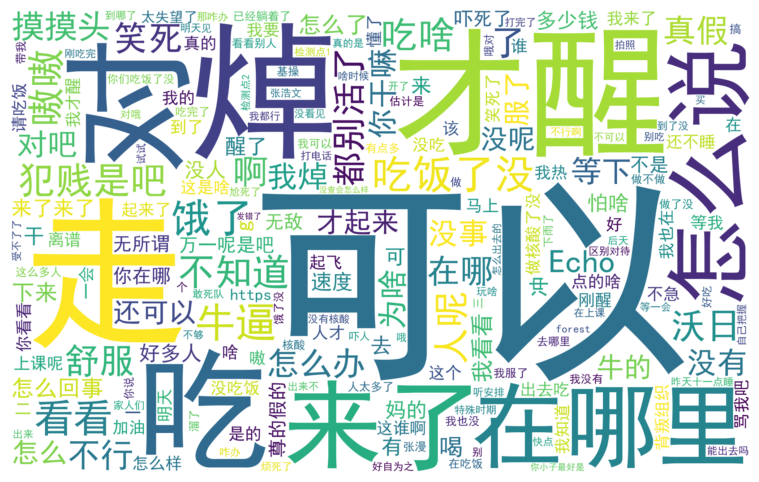

In [252]:
from nltk import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk
import re
from wordcloud import WordCloud

# 下载 NLTK 的停用词
nltk.download('stopwords')
text = ' '.join(group_data["StrContent"].astype(str))
blocked_char = '哈'  #处理群里的Bot人
text = re.sub(r'\b\w*' + re.escape(blocked_char) + r'\w*\b', '', text)

emoji_pattern = re.compile(r'\[[^\]]+\]')  #处理群里的表情人 
text = emoji_pattern.sub(r'', text)
# 定义要去除的命名实体
entities_to_remove = ['OK', '积分', '昵称', 'ID', '嗯', '没', '强',
                      '左食指', 'Tanyang', '浩文', '阿楚姑娘', 'coo_ool', 'Lou', 'Tanyang1520', 'Kz', '一碗www'
                      ]
# 使用正则表达式去除命名实体
for entity in entities_to_remove:
    text = re.sub(r'\b{}\b'.format(re.escape(entity)), '', text)

font_path = "SimHei.ttf"
wordcloud = WordCloud(
    width=2048,
    height=1280,
    background_color='white',
    font_path=font_path  # 指定中文字体文件路径
).generate(text)
# 绘制词云
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(name)
plt.show()

/tmp/ipykernel_2174/339059789.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_data['year'] = average_data["StrTime"].dt.to_period('Y')
/tmp/ipykernel_2174/339059789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_data['month'] = average_data["StrTime"].dt.to_period('M')
/tmp/ipykernel_2174/339059789.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

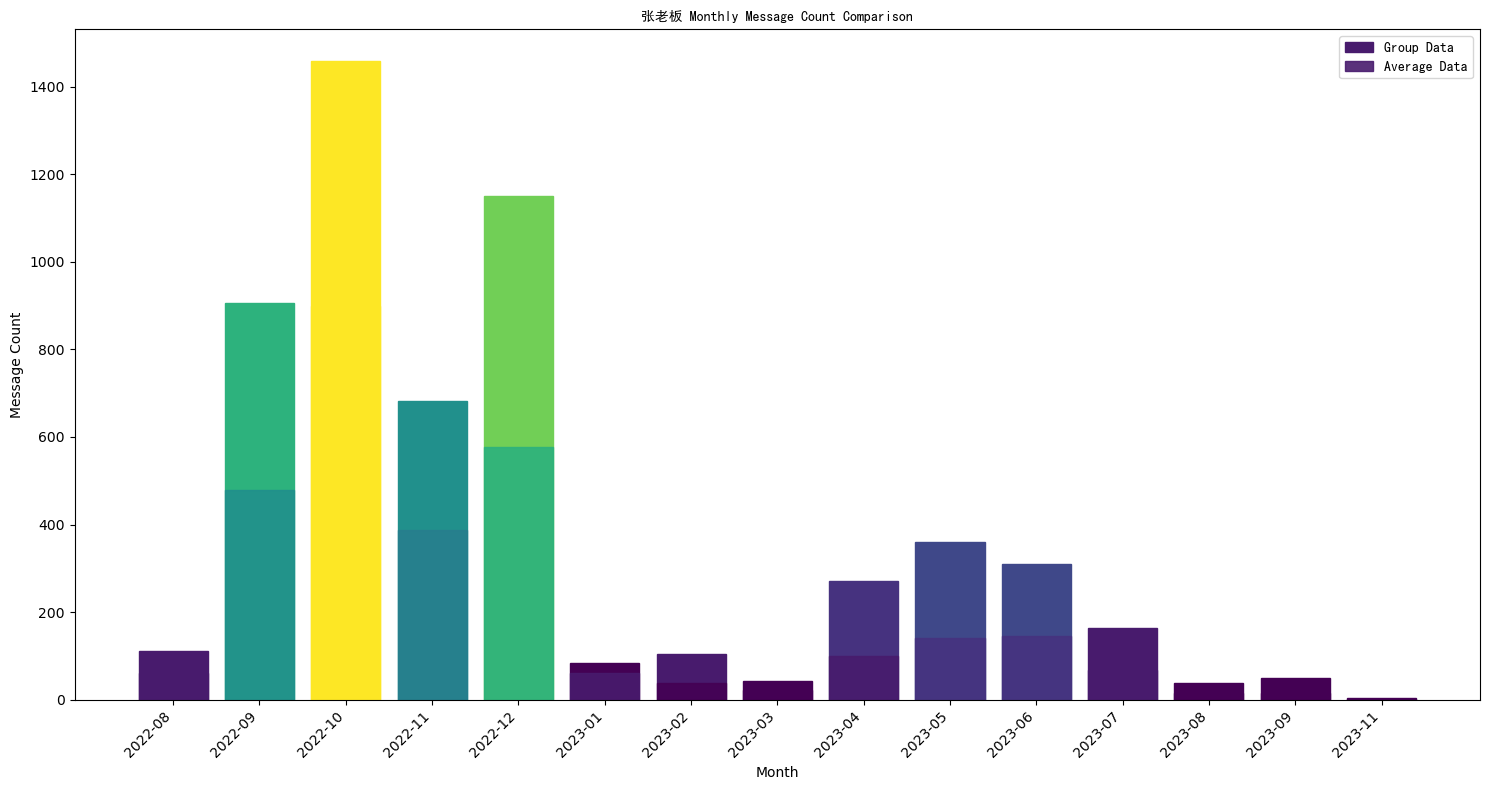

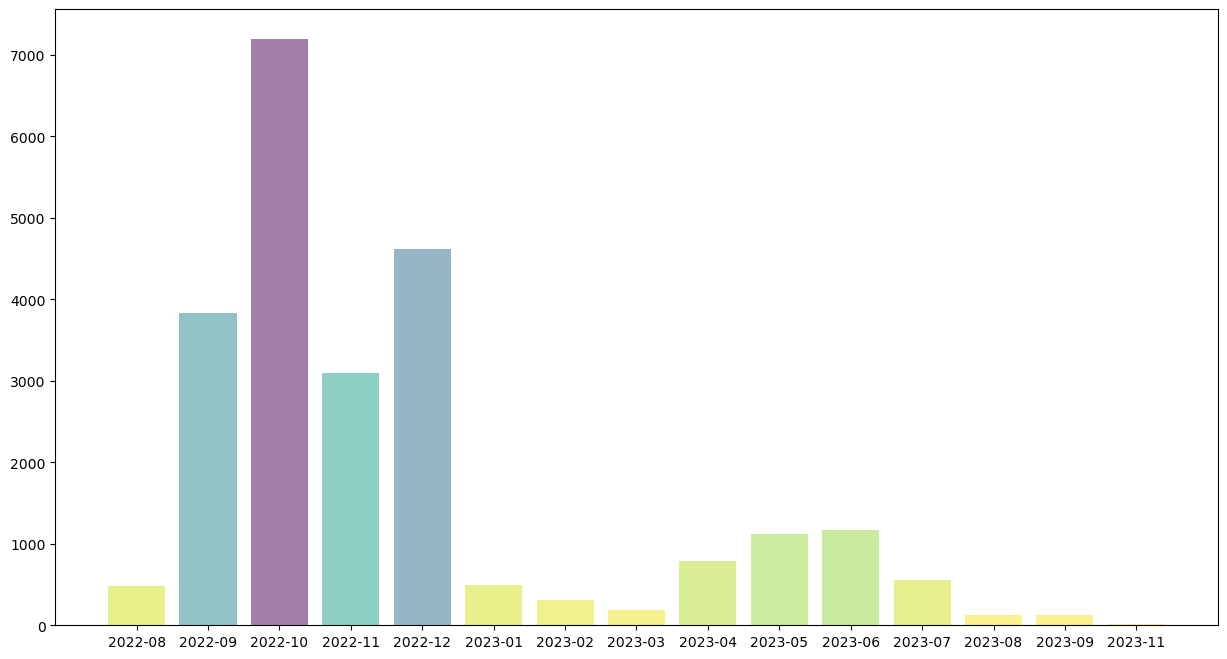

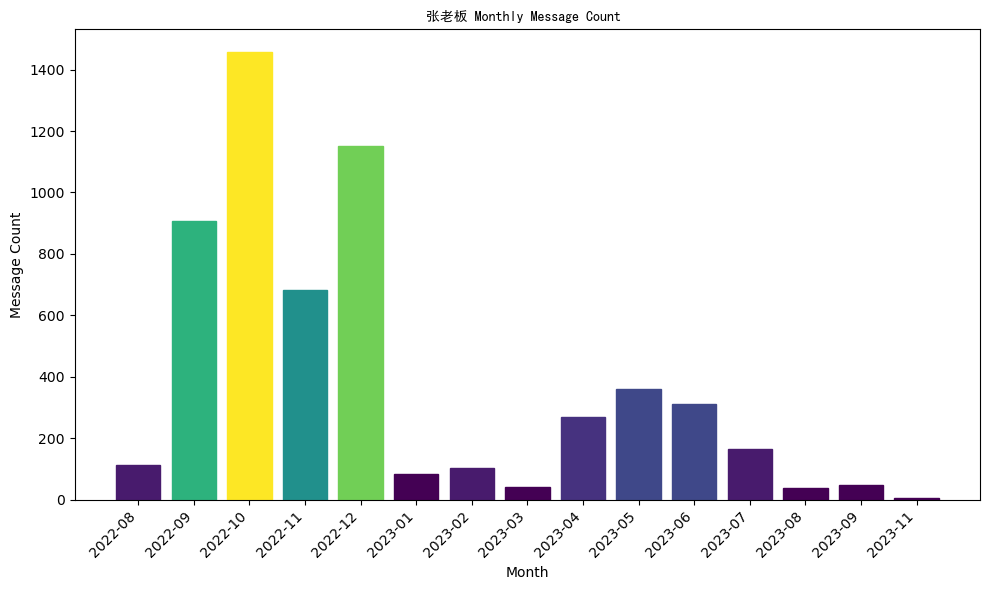

In [260]:
from matplotlib.font_manager import FontProperties
# 平均数值
average_data = analyzer.filter_data(
    [analyzer.df["NowNickName"] == groupname, analyzer.df["Type"] == "1"])
average_data['year'] = average_data["StrTime"].dt.to_period('Y')
average_data['month'] = average_data["StrTime"].dt.to_period('M')
average_data['hour'] = average_data["StrTime"].dt.to_period('H')
average_data['day'] = average_data["StrTime"].dt.to_period('D')
average_data['weekday'] = average_data["StrTime"].dt.to_period('W')

# 计算 group_data 的月度消息频率
group_monthly_counts = group_data.groupby('month').size().reset_index(name='group_message_count')
group_monthly_counts['month_str'] = group_monthly_counts['month'].astype(str)

# 计算 average_data 的月度消息频率
average_monthly_counts = average_data.groupby('month').size().reset_index(name='average_message_count')
average_monthly_counts['month_str'] = average_monthly_counts['month'].astype(str)
average_monthly_counts['average_message_count'] /= 8
# 创建渐变颜色
group_colors = plt.cm.viridis_r(group_monthly_counts['group_message_count'] / group_monthly_counts['group_message_count'].max())
average_colors = plt.cm.viridis_r(average_monthly_counts['average_message_count'] / average_monthly_counts['average_message_count'].max())

plt.figure(figsize=(15, 8))
font_prop = FontProperties(fname=font_path)

# 绘制 group_data 的柱状图
group_bars = plt.bar(group_monthly_counts['month_str'], group_monthly_counts['group_message_count'],
                      color=group_colors, label='Group Data')

# 绘制 average_data 的柱状图，设置为半透明
average_bars = plt.bar(average_monthly_counts['month_str'], average_monthly_counts['average_message_count'],
                        color=average_colors, label='Average Data', alpha=0.9)

# 添加颜色条
group_color_map = LinearSegmentedColormap.from_list('group_color_map', plt.cm.viridis.colors, N=len(group_monthly_counts))
average_color_map = LinearSegmentedColormap.from_list('average_color_map', plt.cm.viridis.colors, N=len(average_monthly_counts))

for bar in group_bars:
    bar.set_color(group_color_map(bar.get_height() / max(group_monthly_counts['group_message_count'])))

for bar in average_bars:
    bar.set_color(average_color_map(bar.get_height() / max(average_monthly_counts['average_message_count'])))

plt.xlabel('Month')
plt.ylabel('Message Count')
plt.title(name + ' Monthly Message Count Comparison', fontproperties=font_prop)
plt.xticks(rotation=45, ha='right')
plt.legend(prop=font_prop)
plt.tight_layout()
# 保存图像
plt.savefig('comparison_chart.png')
plt.show()




# 统计频率
average_monthly_counts = average_data.groupby('month').size().reset_index(name='average_message_count')
average_monthly_counts['month_str'] = average_monthly_counts['month'].astype(str)
average_colors = plt.cm.viridis_r(average_monthly_counts['average_message_count'] / average_monthly_counts['average_message_count'].max())
plt.figure(figsize=(15, 8))
font_prop = FontProperties(fname=font_path)
average_bars = plt.bar(average_monthly_counts['month_str'], average_monthly_counts['average_message_count'],
                        color=average_colors, label='Average Data', alpha=0.5)



monthly_counts = group_data.groupby('month').size().reset_index(name='message_count')

# 将 Period 转换为日期
monthly_counts['month_str'] = monthly_counts['month'].astype(str)
# 创建渐变颜色
colors = plt.cm.viridis_r(monthly_counts['message_count'] / monthly_counts['message_count'].max())
plt.figure(figsize=(10, 6))
font_prop = FontProperties(fname=font_path)

bars = plt.bar(monthly_counts['month_str'], monthly_counts['message_count'],
               color=plt.cm.viridis(monthly_counts['message_count'] / max(monthly_counts['message_count'])))
# 添加颜色条
color_map = LinearSegmentedColormap.from_list('color_map', plt.cm.viridis.colors, N=len(monthly_counts))
for bar in bars:
    bar.set_color(color_map(bar.get_height() / max(monthly_counts['message_count'])))
plt.xlabel('Month')
plt.ylabel('Message Count')
plt.title(name + ' Monthly Message Count ', fontproperties=font_prop)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# 保存图像
plt.savefig('comparison_chart.png')
plt.show()